# CROP RECOMMENDER
##### Reference : https://www.kaggle.com/patelris/crop-prediction-analysis-w-classification

In [76]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, pi, log
from scipy.stats import norm
import statistics
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
from six import StringIO
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
cropdata = pd.read_csv("Crop_recommendation.csv")
cropdata.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

# ANALYSING DATA

In [78]:
cropdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [79]:
cropdata.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [80]:
print("Number of crops : ",len(cropdata['label'].unique()))
print("List of crops   : ",cropdata['label'].unique())

Number of crops :  22
List of crops   :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [81]:
cropdata.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [82]:
cropdata['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [83]:
crop_summary = pd.pivot_table(cropdata,index=['label'],aggfunc='mean')
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

In [84]:
crop_summary = pd.pivot_table(cropdata,index=['label'],aggfunc='std')
crop_summary

K          N         P   humidity        ph   rainfall  \
label                                                                        
apple        3.320871  11.863704  8.139665   1.458551  0.268932   7.102985   
banana       3.382591  11.107241  7.690339   2.805481  0.270650   9.398150   
blackgram    3.188109  12.664258  7.151259   2.798326  0.372533   4.184186   
chickpea     3.261901  12.150649  7.498545   1.711979  0.801127   7.944350   
coconut      2.998636  11.761931  8.357244   2.686329  0.287632  29.472333   
coffee       3.246817  12.345203  7.276113   5.838566  0.417132  25.695086   
cotton       3.169680  11.628817  7.348634   3.050955  0.627170  11.231812   
grapes       3.265662  12.466829  7.619029   1.177111  0.298265   2.951759   
jute         3.313563  10.968274  7.195706   5.507798  0.446349  15.078367   
kidneybeans  3.102215  10.834266  7.571104   2.167323  0.145220  26.111384   
lentil       2.968164  12.196915  7.335427   2.935461  0.549266   5.632972   
maize        2.941500  11.949490  8.010498   5.448699  0.412681  15.547339   
mango        3.096691  12.329037  7.663873   2.756285  0.703655   3.338577   
mothbeans    3.047950  11.343418  7.547151   6.994600  1.862163  13.750693   
mungbean     3.148368  11.510641  7.870261   2.851356  0.286574   7.117214   
muskmelon    3.218256  12.176215  7.187363   1.505117  0.231523   2.773999   
orange       3.056687  11.941930  7.691495   1.430343  0.576321   5.717125   
papaya       3.097474  12.219607  7.057305   1.420446  0.147351  64.396577   
pigeonpeas   2.815165  11.849950  7.294463  10.963659  0.830274  32.986321   
pomegranate  3.032800  12.617652  7.387370   2.825706  0.491509   2.895339   
rice         2.946167  11.917981  7.904966   1.418381  0.768692  34.291825   
watermelon   3.264687  12.565127  7.535773   2.956603  0.281420   5.867006   

             temperature  
label                     
apple           0.827404  
banana          1.428359  
blackgram       2.686357  
chickpea        1.169838  
coconut         1.385734  
coffee          1.502635  
cotton          1.135681  
grapes          9.738649  
jute            1.185138  
kidneybeans     2.599573  
lentil          3.320985  
maize           2.679360  
mango           2.653858  
mothbeans       2.209665  
mungbean        0.841546  
muskmelon       0.861295  
orange          7.342535  
papaya          6.263022  
pigeonpeas      5.715682  
pomegranate     2.206355  
rice            2.031272  
watermelon      0.850124

In [85]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['ph'],
    name='pH',
    marker_color='Red'
))


fig.update_layout(title="N-P-K and pH values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [86]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['humidity'],
    name='Humidity',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['rainfall'],
    name='Rainfall',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['temperature'],
    name='Temperature',
    marker_color='orange'
))

fig.update_layout(title="Humidty, Temperature, Rainfall values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

# SPLITING DATA TO TRAIN AND TEST

In [87]:
features = cropdata[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = cropdata['label']
acc = []
model = []
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# USING DECISION TREE CLASSIFICATION ALGORITHM

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

### Visualising decision tree

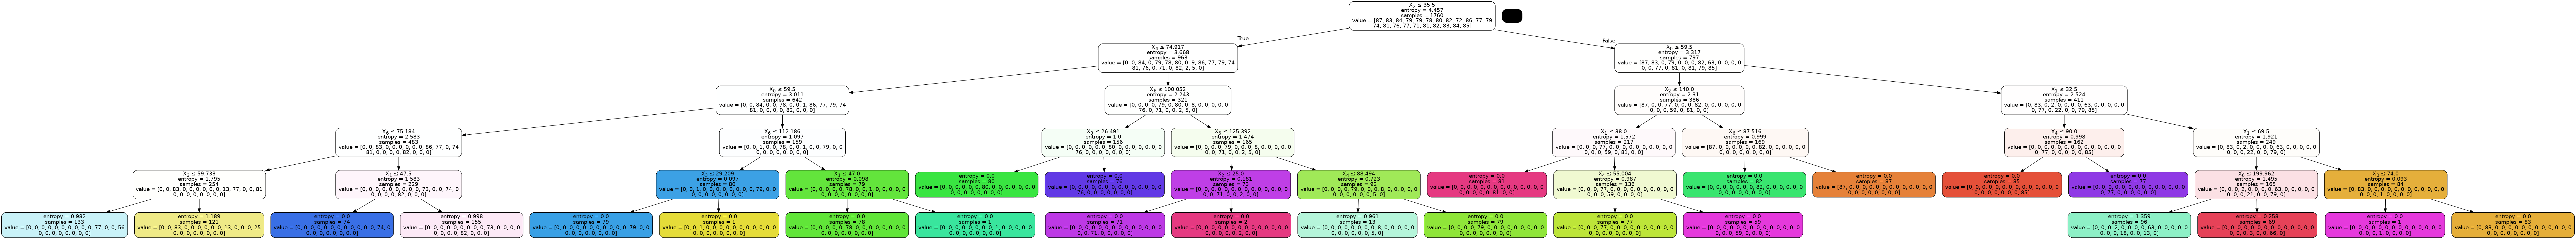

In [89]:
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Cross validation

In [90]:
score = cross_val_score(DT, features, target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [0.92727273 0.94545455 0.92272727 0.92272727 0.91363636 0.92272727
 0.86818182 0.92272727 0.94090909 0.93181818]
Average cross-validation score: 0.92


### Accuracy

In [91]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


### Confusion matrix

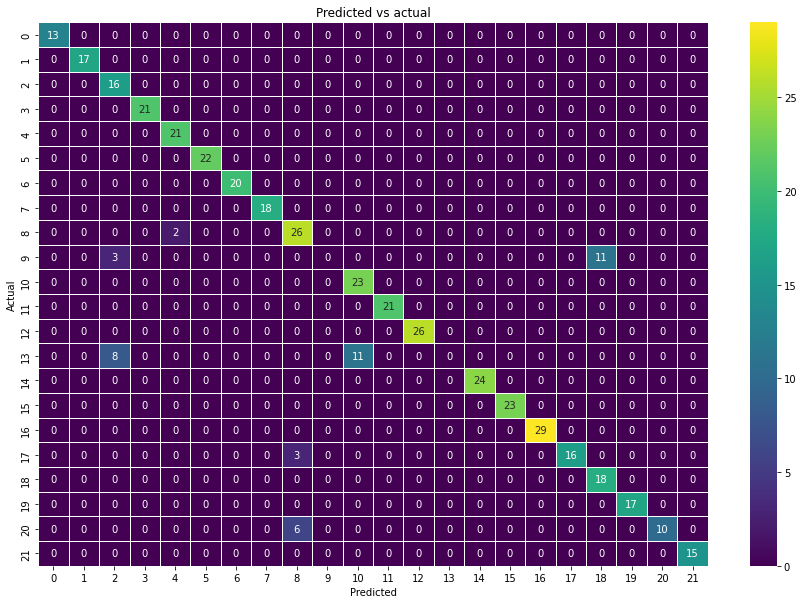

In [92]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Custom Decision Tree

<br>
<table>
  <thead>
    <tr>
      <th>N(Nitrogen)</th>
      <th>P(Phosphorus)</th>
      <th>K(Potassium)</th>
      <th>Crops</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>78</td>
      <td>35</td>
      <td>45</td>
      <td>rice</td>
    </tr>
    <tr>
      <td>65</td>
      <td>37</td>
      <td>40</td>
      <td>rice</td>
    </tr>
    <tr>
      <td>83</td>
      <td>68</td>
      <td>23</td>
      <td>maize</td>
    </tr>
    <tr>
      <td>83</td>
      <td>57</td>
      <td>19</td>
      <td>maize</td>
    </tr>
    <tr>
      <td>40</td>
      <td>72</td>
      <td>77</td>
      <td>chickpeas</td>
    </tr>
    <tr>
      <td>23</td>
      <td>72</td>
      <td>84</td>
      <td>chickpeas</td>
    </tr>
  </tbody>
</table>


<img src="Decision-Tree.png" alt="Drawing" style="width: 400px;"/>


<table>
	<thead>
	<tr>
		<th>Nitrogen<br></th>
		<th>Phosphorus<br></th>
		<th>Potassium<br></th>
		<th>Crops<br></th>
	</tr>
    </thead>    
    <tbody>
	<tr>
		<td>48 <br></td>
		<td>&nbsp;62</td>
		<td>47<br></td>
		<td>&nbsp;papaya</td>
	</tr>
	<tr>
		<td>&nbsp;39</td>
		<td>&nbsp;69</td>
		<td>53<br></td>
		<td>&nbsp;papaya</td>
	</tr>
	<tr>
		<td>&nbsp;49</td>
		<td>&nbsp;61</td>
		<td>45<br></td>
		<td>&nbsp;papaya</td>
	</tr>
	<tr>
		<td>&nbsp;48</td>
		<td>&nbsp;57</td>
		<td>54<br></td>
		<td>&nbsp;papaya</td>
	</tr>
	<tr>
		<td>&nbsp;69</td>
		<td>&nbsp;66</td>
		<td>49<br></td>
		<td>&nbsp;papaya</td>
	</tr>
	<tr>
		<td>&nbsp;11</td>
		<td>&nbsp;6</td>
		<td>25<br></td>
		<td>&nbsp;coconut</td>
	</tr>
	<tr>
		<td>&nbsp;16</td>
		<td>&nbsp;14</td>
		<td>30<br></td>
		<td>&nbsp;coconut</td>
	</tr>
	<tr>
		<td>&nbsp;33</td>
		<td>&nbsp;14</td>
		<td>35<br></td>
		<td>&nbsp;coconut</td>
	</tr>
	<tr>
		<td>&nbsp;16</td>
		<td>&nbsp;6</td>
		<td>29<br></td>
		<td>&nbsp;coconut</td>
	</tr>
	<tr>
		<td>&nbsp;32</td>
		<td>&nbsp;11</td>
		<td>31<br></td>
		<td>&nbsp;coconut</td>
	</tr>
	<tr>
		<td>&nbsp;19</td>
		<td>&nbsp;7</td>
		<td>9<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;28</td>
		<td>&nbsp;7</td>
		<td>9<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;24</td>
		<td>&nbsp;30</td>
		<td>11<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;7</td>
		<td>&nbsp;17</td>
		<td>10<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;18</td>
		<td>&nbsp;23</td>
		<td>8<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;7</td>
		<td>&nbsp;20</td>
		<td>12<br></td>
		<td>&nbsp;orange</td>
	</tr>
	<tr>
		<td>&nbsp;85</td>
		<td>&nbsp;21</td>
		<td>47<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>
	<tr>
		<td>&nbsp;90</td>
		<td>&nbsp;23</td>
		<td>54<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>
	<tr>
		<td>&nbsp;99</td>
		<td>&nbsp;29</td>
		<td>55<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>
	<tr>
		<td>&nbsp;102</td>
		<td>&nbsp;11</td>
		<td>47<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>
	<tr>
		<td>&nbsp;80</td>
		<td>&nbsp;18</td>
		<td>51<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>
	<tr>
		<td>&nbsp;87</td>
		<td>&nbsp;21</td>
		<td>52<br></td>
		<td>&nbsp;muskmelon</td>
	</tr>	</thead>
	</tbody>
</table>

<img src="Random-Forest2.png" alt="Drawing" style="width: 400px;"/>


# USING RANDOM FOREST CLASSIFICATION ALGORITHM

In [94]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

### Visualising Random forest

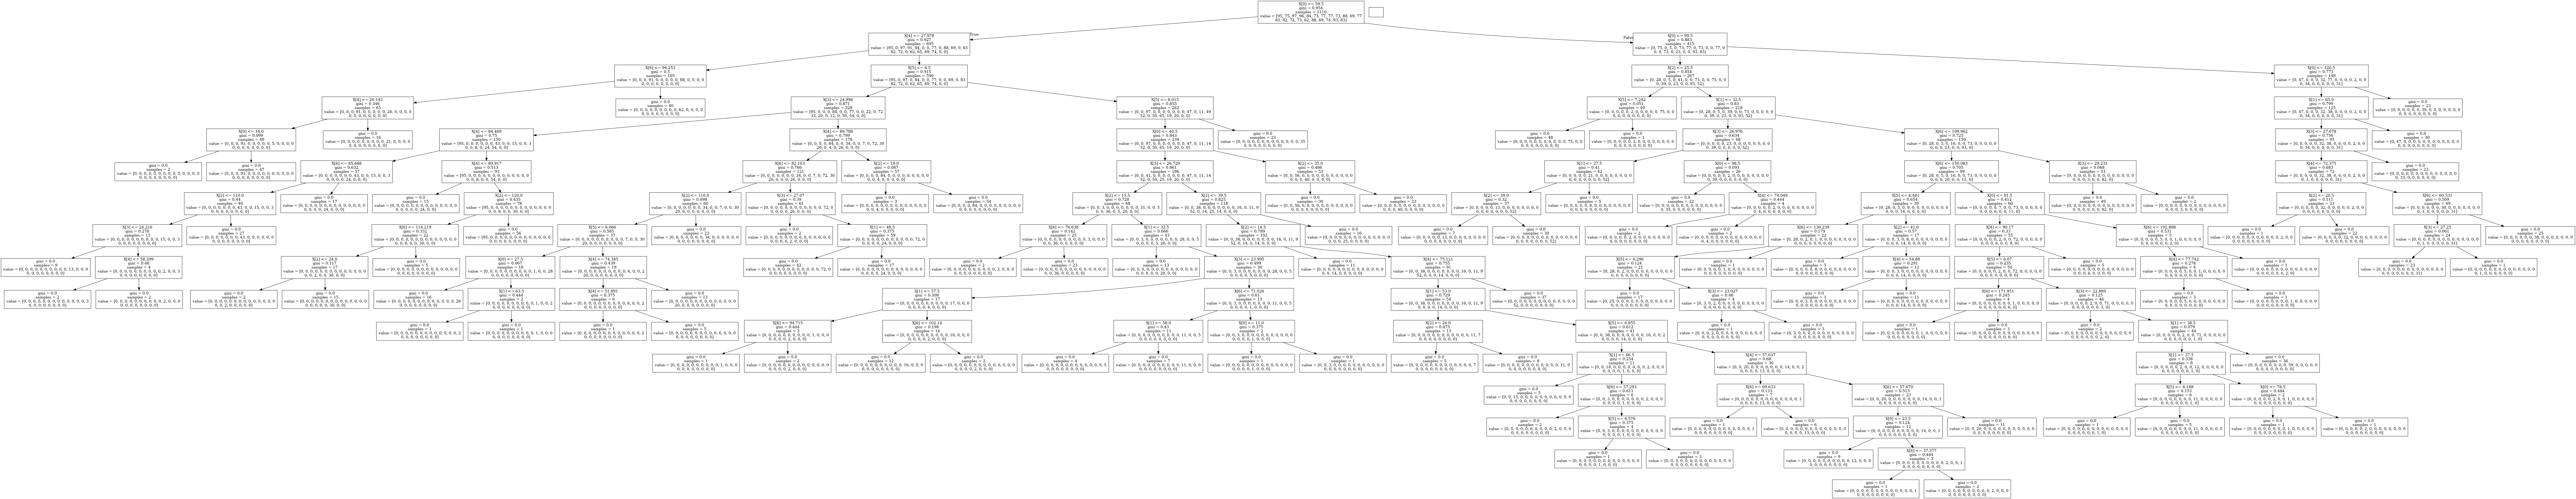

In [95]:
dotfile = StringIO()
i_tree = 0
for tree_in_forest in RF.estimators_:
    if (i_tree <1):        
        export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1
Image(filename="dtree0.png")

### Cross validation

In [96]:
score = cross_val_score(RF,features,target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [0.99545455 0.99545455 1.         0.98636364 0.99545455 0.99545455
 0.99545455 0.99545455 0.98636364 0.99545455]
Average cross-validation score: 0.99


### Accuracy

In [97]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


### Confusion Matrix

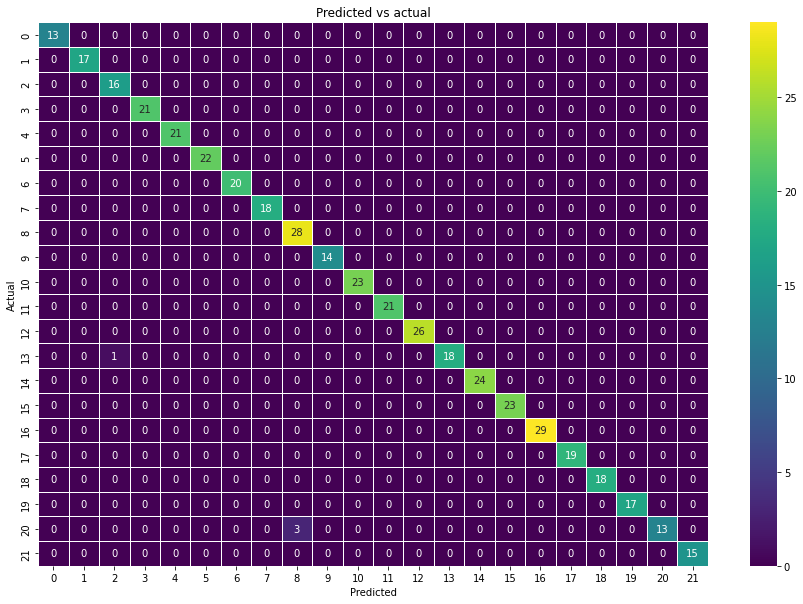

In [98]:
y_pred = RF.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Custom Random forest

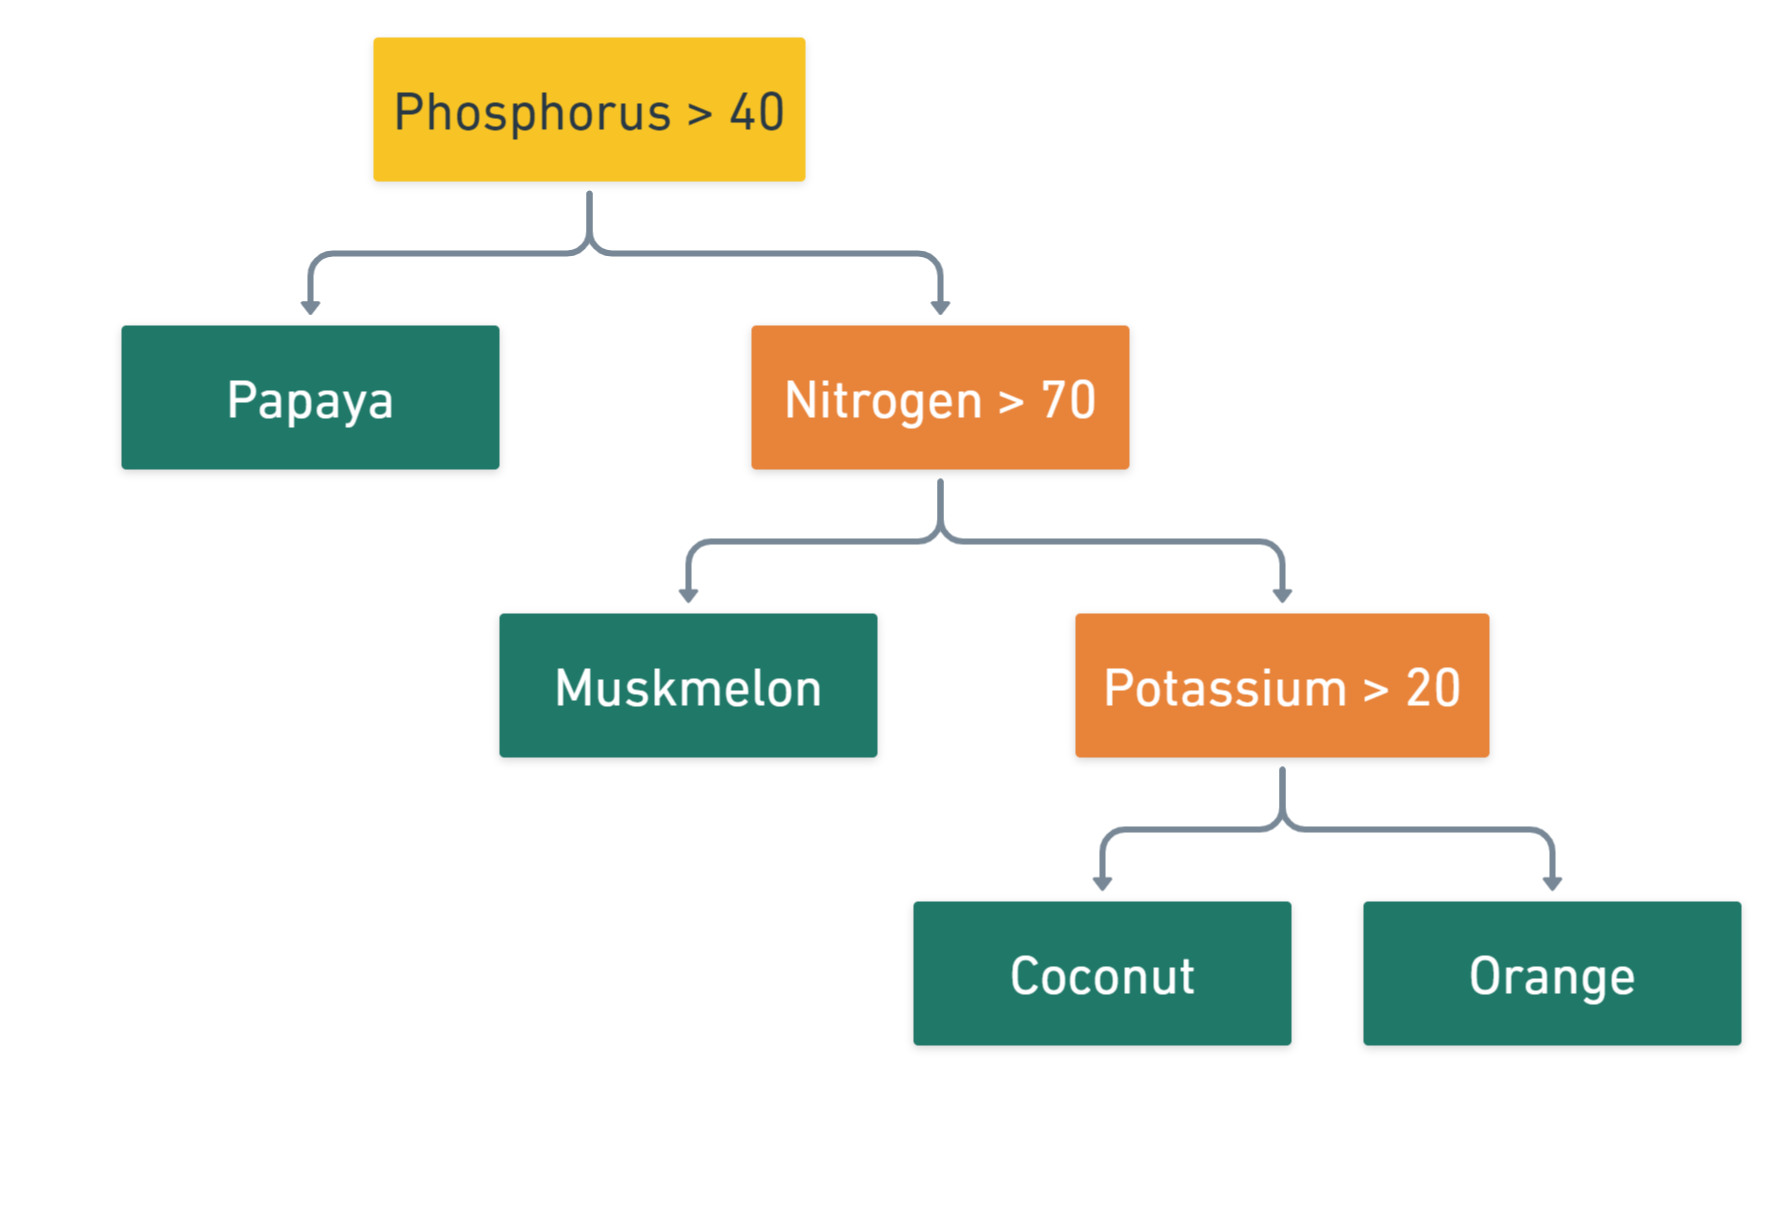

In [114]:
Image1 = Image(filename="Random-Forest.png")
Image1 = Image(filename="Random-Forest2.png")
Image1 = Image(filename="Random-Forest3.png")
display(Image1,Image2,)

# USING NAIVEBAYES CLASSIFICATION ALGORITHM

In [100]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

### Cross validation

In [101]:
score = cross_val_score(NaiveBayes,features,target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [1.         0.99545455 1.         0.99090909 0.99090909 1.
 0.99090909 1.         0.98636364 0.99545455]
Average cross-validation score: 1.00


### Accuracy

In [102]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


### Confusion matrix

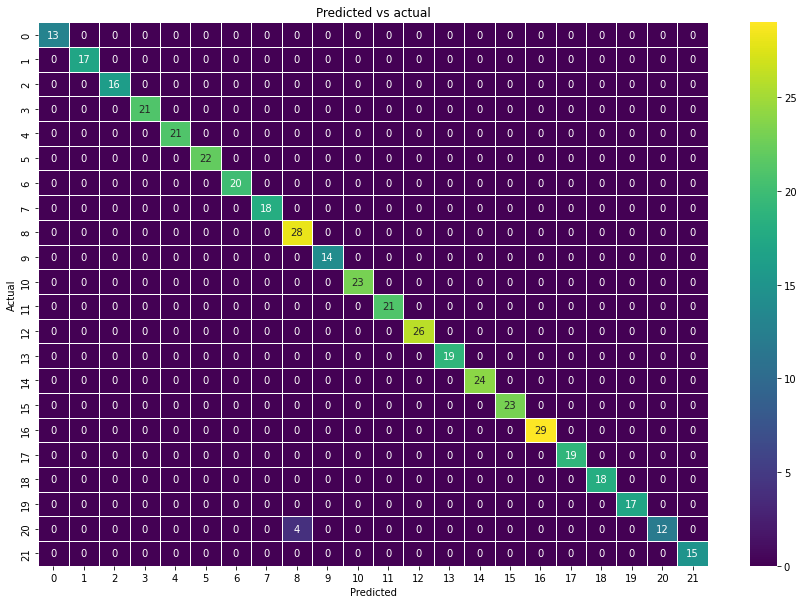

In [103]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Custom Naive Bayes

In [110]:
def calculate_probability(x,mean,sd):
    exponent = exp(-0.5*((x-mean)/sd)**2)
    return ((1/(sd*sqrt(2*pi)))*exponent)

read = pd.read_csv("Crop_recommendation.csv")

N = float(input("N : "))
P = float(input("P : "))
K = float(input("K : "))
temp = float(input("temp : "))
humidity = float(input("humidity : "))
ph = float(input("Ph : "))
rainfall = float(input("rainfall : "))


data={}
for i in read['label'].unique():
    for col in read.columns[0:len(read.columns)-1]:
        list = []
        for k in range(len(read)):
            if read['label'][k] == i:
                list.append(read[col][k])
        if(col=='N'):
            input = N
        elif (col == 'P'):
            input=P
        elif (col=='K'):
            input = K
        elif (col == 'temperature'):
            input = temp
        elif (col == 'humidity'):
            input = humidity
        elif (col == 'ph'):
            input = ph
        elif (col == 'rainfall'):
            input = rainfall
            
        x_axis = np.asarray(list)
        mean = statistics.mean(x_axis)
        sd = statistics.stdev(x_axis)
        value = calculate_probability(input, mean, sd)
        data[str(i)+str(col)] = value


probabilityofanycrop= 21/(21*100)

Score = {}
score = log(probabilityofanycrop)

for i in read['label'].unique():
    for col in read.columns[0:len(read.columns)-1]:
        try:
            value+=log(data[str(i)+str(col)])
        except:
            value+=log(1)
    Score[i] = value
    value = log(probabilityofanycrop)


maximum = Score['rice']
for keys in Score:
    maximum = max(maximum,Score[keys])
for keys in Score:
    if Score[keys]==maximum :
        print()
        print("Suitable crop is : ",keys)


Suitable crop is :  mothbeans
